## Метод градиентного спуска

**Вопрос**: что такое градиент?

Градиент указывает направление, в котором некоторая функция $f$ возрастает больше всего:
$$\nabla f = \frac{\partial f}{\partial x_1} e_1 + ... + \frac{\partial f}{\partial x_n} e_n$$

$\frac{\partial f}{\partial x_i}$ -- частная производная функции $f$ по $x_i$, $e_i$ -- базисный вектор.

Возьмем некоторую точку $a$ — в окрестности этой точки функция $F$ должна быть определена и дифференцируема, тогда вектор антиградиента будет указывать на направление, в котором функция $F$ убывает быстрее всего. Отсюда делается вывод, что в некоторой точке $b$, равной $b = a - \varepsilon \nabla F(a)$; при некотором малом $\varepsilon$ значение функции будет меньше либо равным значению в точке $а$. 

Можно представить это, как движение вниз по холму — сделав шаг вниз, текущая позиция будет ниже, чем предыдущая. Таким образом, на каждом следующем шаге высота будет как минимум не увеличиваться.

Пусть $S$ -- функция потерь (MSE, MAE, ...). Исходя из определений выше, можно получить формулу для нахождения неизвестных параметров:
$$x_j = x_{j-1} - \varepsilon \frac{\partial S}{\partial x_j}$$

**Пример**: необходимо минимизировать функцию $y(x) = (x-5)^2$

1. Находим производную по $x$: $\frac{\partial y}{\partial x} = 2(x-5)$

2. Выберем начальное значение: $x_0 = 0$, шаг $\varepsilon = 0.1$ и максимальное количество итераций: $n=25$

3. Для всех $i = 1, ..., 25$ рассчитаем $x_i = x_{i-1} - \varepsilon \frac{\partial y}{\partial x}|_{x = x_i}$

In [1]:
# для нахождения производной
from scipy.misc import derivative

%matplotlib inline
from matplotlib import pylab as plt

In [2]:
# определяем функцию
def f(x):
    return (x-5)**2

# проверяем нахождение f'(x)
derivative(f, 0)

-10.0

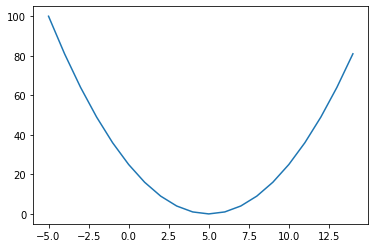

In [3]:
# рисуем график функции
x = range(-5,15)
y = [f(xn) for xn in x]
plt.plot(x, y)
plt.show()

In [4]:
# начальн. значение
xn = 0 
yn = f(xn)

# заводим словарь, где будем хранить все найденные значения функции
Y = {xn: yn}

# шаг ГС (произвольный подибраем)
step = 0.1

# по формуле градиентного спуска получаем все значения x y
for _ in range(25):
    xn = xn - step*derivative(f, xn)
    yn = f(xn)
    Y[xn] = yn

Y

{0: 25,
 1.0: 16.0,
 1.8: 10.240000000000002,
 2.4400000000000004: 6.553599999999998,
 2.9520000000000004: 4.194303999999998,
 3.3616: 2.6843545599999996,
 3.68928: 1.7179869183999996,
 3.9514240000000003: 1.0995116277759995,
 4.1611392: 0.7036874417766399,
 4.32891136: 0.4503599627370493,
 4.4631290880000005: 0.2882303761517112,
 4.570503270400001: 0.184467440737095,
 4.65640261632: 0.11805916207174093,
 4.725122093056: 0.07555786372591429,
 4.7800976744448: 0.04835703278458515,
 4.82407813955584: 0.030948500982134555,
 4.859262511644672: 0.019807040628566166,
 4.8874100093157375: 0.012676506002282305,
 4.90992800745259: 0.008112963841460612,
 4.927942405962073: 0.005192296858534741,
 4.942353924769658: 0.0033230699894622544,
 4.953883139815726: 0.0021267647932558427,
 4.9631065118525814: 0.0013611294676837131,
 4.9704852094820655: 0.0008711228593175555,
 4.976388167585652: 0.0005575186299632523,
 4.981110534068522: 0.000356811923176468}

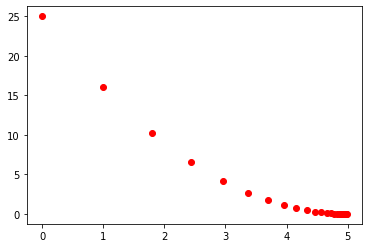

In [5]:
# наносим найденные точки на график
plt.plot(list(Y.keys()), list(Y.values()), 'ro')
plt.show()

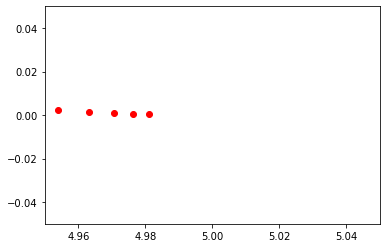

In [6]:
# масштабируем
plt.plot(list(Y.keys()), list(Y.values()), 'ro')
plt.axis([4.95, 5.05, -0.05, 0.05])
plt.show()

In [7]:
# словарь значений, где key = х (просто инвертируем Y)
X = {}
for i in range(len(Y)):
    X[list(Y.values())[i]] = list(Y.keys())[i]

# выводим пару искомых минимальных X и Y (близких к минимумам)
print ('мин. Х =', min(X.items())[1])
print ('мин. Y =', min(X.items())[0])

мин. Х = 4.981110534068522
мин. Y = 0.000356811923176468


<img src="https://hsto.org/files/dd8/48b/b4b/dd848bb4b5484825854e8e8f6712dfb3.gif">

Всегда ли градиентный спуск эффективен? Нет, необходимо выбирать длину шага корректно -- можно "перейти" через глобальный минимум и найти один из локальных. 

Пример "плохой" функции: $y = (x-5)^2 + 50\sin(x) + 50$ 

<img src="https://hsto.org/files/ba3/d98/dc7/ba3d98dc7ab14212a582d59c5e649617.gif">

...Но и подбор шага не всегда помогает:
    
<img src="https://hsto.org/files/376/7a8/b8c/3767a8b8cdd34602929a78fd0f51fe89.gif">

Рассмотрим функцию $z(x,y) = 4x^2 + 16y^2$

<img src="https://hsto.org/r/w1560/files/ef9/503/62a/ef950362a9a64342bdcf23bd3d9cf469.png">

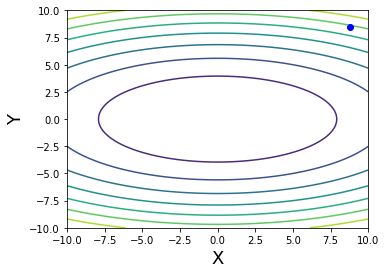

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np


STEP_COUNT = 25
STEP_SIZE = 0.005  # Скорость обучения
X = np.array([i for i in np.linspace(-10, 10, 1000)])
Y = np.array([i for i in np.linspace(-10, 10, 1000)])


def func(X, Y):
    return 4 * (X ** 2) + 16 * (Y ** 2)


def dx(x):
    return 8 * x


def dy(y):
    return 32 * y

skip_first = True
def draw_gradient_points(num, point, line):
    global previous_x, previous_y, skip_first, ax
    if skip_first:
        skip_first = False
        return point
    current_x = previous_x - STEP_SIZE * dx(previous_x)
    current_y = previous_y - STEP_SIZE * dy(previous_y)
    print("Step:", num, "CurX:", current_x, "CurY", current_y, "Fun:", func(current_x, current_y))
    point.set_data([current_x], [current_y])
    new_x = list(line.get_xdata()) + [previous_x, current_x]
    new_y = list(line.get_ydata()) + [previous_y, current_y]
    line.set_xdata(new_x)
    line.set_ydata(new_y)

    previous_x = current_x
    previous_y = current_y
    return point


previous_x, previous_y = 8.8, 8.5
fig, ax = plt.subplots()
p = ax.get_position()
ax.set_position([p.x0 + 0.1, p.y0, p.width * 0.9, p.height])
ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("Y", fontsize=18)

X, Y = np.meshgrid(X, Y)
plt.contour(X, Y, func(X, Y))
point, = plt.plot([8.8], [8.5], 'bo')
line, = plt.plot([], color='black')


gradient_anim = anim.FuncAnimation(fig, draw_gradient_points, frames=STEP_COUNT,
                                   fargs=(point, line),
                                   interval=1500)

<img src="https://hsto.org/files/967/b34/8ea/967b348ead36449c960a91eeb529021f.gif">

Основные типы градиентных методов:
    
1) **Пакетный градиентный спуск**:
Он использует весь пакет данных на каждом этапе итерации, в результате довольно медленно обрабатывает большие наборы обучающих данных. Это предпочтительнее, только если вы хотите обработать все экземпляры в обучающем наборе. Единственное ограничение заключается в том, что если обучающий набор очень велик, он будет очень медленным.

2) **Стохастичеческий градиентный спуск**:
Этот алгоритм извлекает случайный экземпляр обучающего набора на каждом шаге итерации и вычисляет градиенты на основе этого случайного экземпляра. Таким образом, работа с одним экземпляром идет быстрее. 

3) **Мини-пакетный градиентный спуск:**
Вычисляет градиенты для небольших случайных наборов экземпляров, известных как мини-пакеты, вместо вычисления набора обучающих данных или одного случайного экземпляра. 

<img src="https://neurohive.io/wp-content/uploads/2018/11/lokalnyi-minimum-gradientnyi-spusk.png">

In [11]:
# Batch Gradient Descent
import numpy as np
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta = np.random.randn(2,1) #random initilization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
print(theta)

[[3.62251052]
 [3.33838529]]


In [12]:
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters
m = 100
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) #random initilization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta)

[[3.50243485]
 [3.48829165]]


In [13]:
# Mini-batch Gradient Descent
n_iterations = 50
minibatch_size = 20
m = 100
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
print(theta)

[[4.10668045]
 [2.84356366]]
